In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context='notebook', style='darkgrid',palette='dark', font_scale=1.2)
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

<AxesSubplot:>

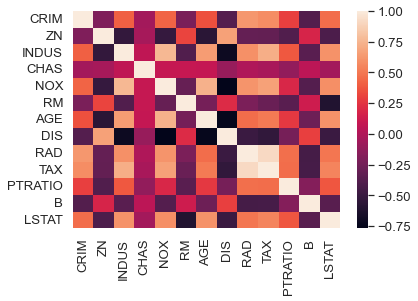

In [31]:
# Loading Dataset
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
sns.heatmap(boston_df.corr())

In [32]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [33]:
class LinearRegression:
    def fit(self,X,y,max_iter=30,alpha=0.01):
        def gradientDescent(X,y,max_iter,alpha):
            m,n=X.shape[0],X.shape[1]+1

            theta=np.random.randn(n).reshape((1,n))
            # Adding a column-vector with all 1 for intercept
            X=np.append(np.ones((m,1)),X,axis=1)
            y=y.reshape((m,1))

            for _ in range(max_iter):
                y_pred=X.dot(theta.T)
                error=y_pred-y
                
                gradient = (1 / m) * X.T.dot(error)
                theta -= alpha * gradient.T
                
            return theta
        
        self.theta=gradientDescent(X,y,max_iter,alpha)

    def predict(self,X):
        m=X.shape[0]
        X=np.append(np.ones((m,1)),X,axis=1)
        y_pred = X.dot(self.theta.T)
        return y_pred.reshape((m,1))
    


In [34]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([[2.42773108e+107],
       [2.44495344e+107],
       [1.71306408e+107],
       [2.44057492e+107],
       [2.44297828e+107],
       [1.62938095e+107],
       [1.55735824e+107],
       [1.45622510e+107],
       [2.27664961e+107],
       [1.57790819e+107],
       [1.75317532e+107],
       [1.54923005e+107],
       [1.55765873e+107],
       [1.69202485e+107],
       [2.34789660e+107],
       [1.41561596e+107],
       [1.69277876e+107],
       [1.38864226e+107],
       [1.55710223e+107],
       [1.77054945e+107],
       [1.86065766e+107],
       [1.65390906e+107],
       [1.17994341e+107],
       [1.41838422e+107],
       [1.74358460e+107],
       [2.44189014e+107],
       [2.18506183e+107],
       [2.39236726e+107],
       [1.56765246e+107],
       [1.90573773e+107],
       [1.55676569e+107],
       [1.53896136e+107],
       [1.59983843e+107],
       [2.44138171e+107],
       [1.54977565e+107],
       [1.40981233e+107],
       [1.55557916e+107],
       [2.39097434e+107],
       [2.43

Text(0.5, 1.0, 'Predicted-Values')

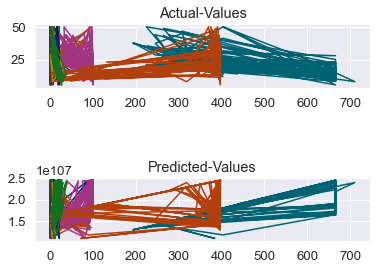

In [35]:
plt.subplot(3, 1, 1)
plt.plot(X_test, y_test)
plt.title("Actual-Values")


plt.subplot(3, 1, 3)
plt.plot(X_test, y_pred)
plt.title("Predicted-Values")


`SK-Learns Model Prediction`

In [36]:
from sklearn.linear_model import LinearRegression as Lin_Reg
sk_model=Lin_Reg()
sk_model.fit(X_train,y_train)
sk_pred=sk_model.predict(X_test)
sk_pred

array([19.51860711, 13.16017841, 23.47233594, 20.3720762 , 19.30783254,
       20.49684878, 32.23708824, 40.34643946, 15.57324659, 28.63946329,
       25.26110738, 23.30432257, 36.89750509, 33.23336735, 11.64879439,
       21.98505879, 15.54580683, 36.9771607 , 17.40826645, 21.10225591,
       14.32846461, 10.94462438, 22.24992377, 24.54257308, 32.21744613,
       18.79579143, 17.63772719,  3.43988974, 34.06112121, 10.93849161,
       26.47211259, 15.40486221, 20.09169899, 20.17915368, 37.76574974,
       34.09829407, 16.87318711,  8.11204909, 22.49323345, 13.06646048,
       15.75965736, 33.25636073, 20.05271603, 31.16029285, 15.98942836,
       20.85767094, 20.77786809, 24.38577449, 20.19408467, 17.51610909,
       16.20139857, 33.88129417, 31.70753922, 17.46548303, 22.41301537,
       27.4662775 , 33.84146019, 10.07895317, 25.29181453, 37.14128285,
       19.79654262, 29.13155204, 35.73108792, 16.9373458 , 22.26783815,
       18.3069267 , 21.86803859, 13.52027285, 22.75107944, 42.58

Text(0.5, 1.0, 'Sk-learns Predicted-Values')

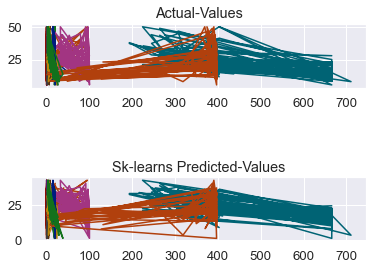

In [37]:
plt.subplot(3, 1, 1)
plt.plot(X_test, y_test)
plt.title("Actual-Values")


plt.subplot(3, 1, 3)
plt.plot(X_test, sk_pred)
plt.title("Sk-learns Predicted-Values")

In [38]:
my_mse = mean_squared_error(y_test, y_pred)
my_r2 = r2_score(y_test, y_pred)

sk_mse = mean_squared_error(y_test, sk_pred)
sk_r2 = r2_score(y_test, sk_pred)

print("My Mean Squared Error: ", my_mse)
print("My R-squared: ", my_r2)
print("sk-learns Mean Squared Error: ", sk_mse)
print("sk-learns R-squared: ", sk_r2)

My Mean Squared Error:  3.378665568285687e+214
My R-squared:  -3.379972711802777e+212
sk-learns Mean Squared Error:  20.255405591046753
sk-learns R-squared:  0.7973675796537242
